# Función logística

$$x_{n+1}=rx_n\left(1-x_n\right)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import optimize

In [2]:
import pandas as pd

Función que genera el mapeo logístico:

In [3]:
def fmap(x,r):
    return r*x*(1-x)

Ahora definimos la sucesión logística de manera recursiva_

In [4]:
def f(x,r,n):
    assert (type(n)==int and n>=0) #Para definir una sucesión
    y=x #valor de inicialización
    for i in range(n):
        y=r*y*(1-y) #actualización
        yield y

In [27]:
x0=0.8
r0=3.57

El siguiente bloque de código calcula el punto fijo $x^*$ de la sucesión logística:

In [28]:
optimize.fixed_point(
    fmap,
    x0,
    args=(r0,),
    xtol=1e-08,
    maxiter=500,
    method='del2'
)

array(0.71988796)

Vamos a imprimir algunos de los elementos de la sucesión logística, con la elección de parámetros $r$ y $x_0$ de las celdas anteriores.

In [29]:
for x in f(x0,r0,15):
    print(x)

0.5711999999999998
0.8744020992
0.39206835316924105
0.8509122118162691
0.45289241196562363
0.8845777242840128
0.36449690712477145
0.8269509152018525
0.5108780636037556
0.8920775538040705
0.34370243473676787
0.8052887238012449
0.5597716985777116
0.8797456182554126
0.37768195753445744


Vamos a graficar $x_n$ contra $n$:

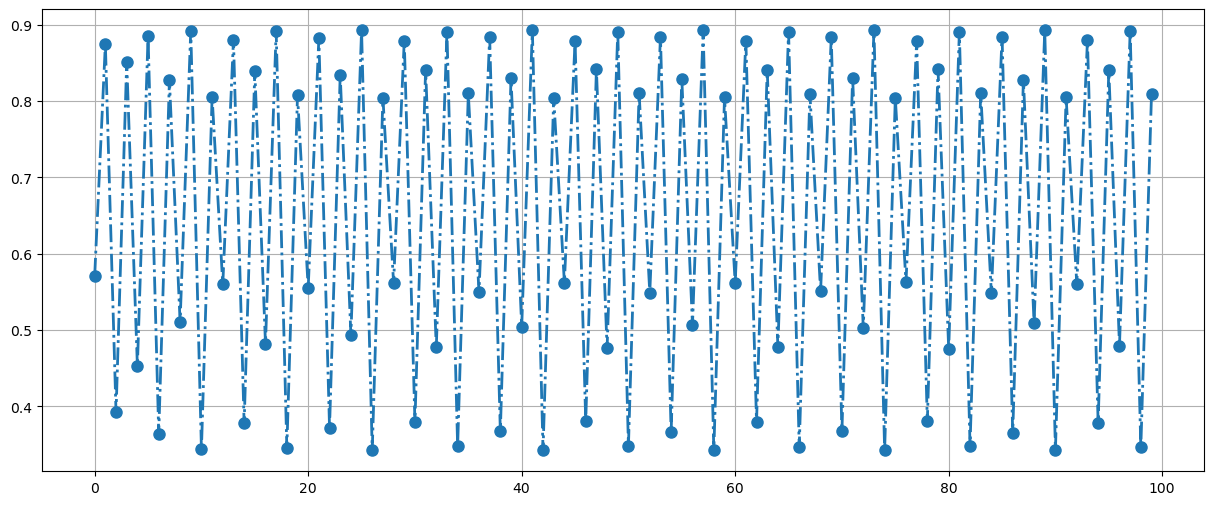

In [31]:
%matplotlib inline
plt.figure(figsize=(15,6))
plt.plot(
    [xi for xi in list(f(x0,r0,100))], #Acá calculé 50 términos
    ls='-.',
    marker='o',
    lw=2,
    ms=8
)
plt.grid()
plt.show()

In [9]:
r0

1.5

Vamos a generar un número aleatorio, entre 0 y 1, para hacer un _ensemble_ de secuencias del modelo logístico.

In [18]:
np.random.uniform(0,1)

0.44711050117009377

In [42]:
N,T=100,200
X=np.empty([N,T])

In [43]:
for i in range(N):
    x0=np.random.uniform(0,1)
    for j,x in enumerate(f(x0,r0,T)):
        X[i,j]=x

In [44]:
(X.T.shape)

(200, 100)

Ahora sacamos la matriz de correlación:

In [45]:
C=pd.DataFrame(X.T).corr().values
C

array([[ 1.        ,  0.94347168,  0.98758822, ...,  0.99489955,
         0.94084581, -0.98285679],
       [ 0.94347168,  1.        ,  0.93621574, ...,  0.94406272,
         0.99992842, -0.89529474],
       [ 0.98758822,  0.93621574,  1.        , ...,  0.99797602,
         0.93483445, -0.99361765],
       ...,
       [ 0.99489955,  0.94406272,  0.99797602, ...,  1.        ,
         0.94213823, -0.99168098],
       [ 0.94084581,  0.99992842,  0.93483445, ...,  0.94213823,
         1.        , -0.89302807],
       [-0.98285679, -0.89529474, -0.99361765, ..., -0.99168098,
        -0.89302807,  1.        ]])

El elemento $c_{ij}$ de la matriz $\mathbf{C}$ da la correlación entre los renglones $i$ y $j$ de la matriz $\mathbf{X}$.

In [48]:
i,j=0,N-1
C[i,j]

-0.9828567911101214

Este número indica _anticorrelación_ de las series de tiempo $i$ y $j$:

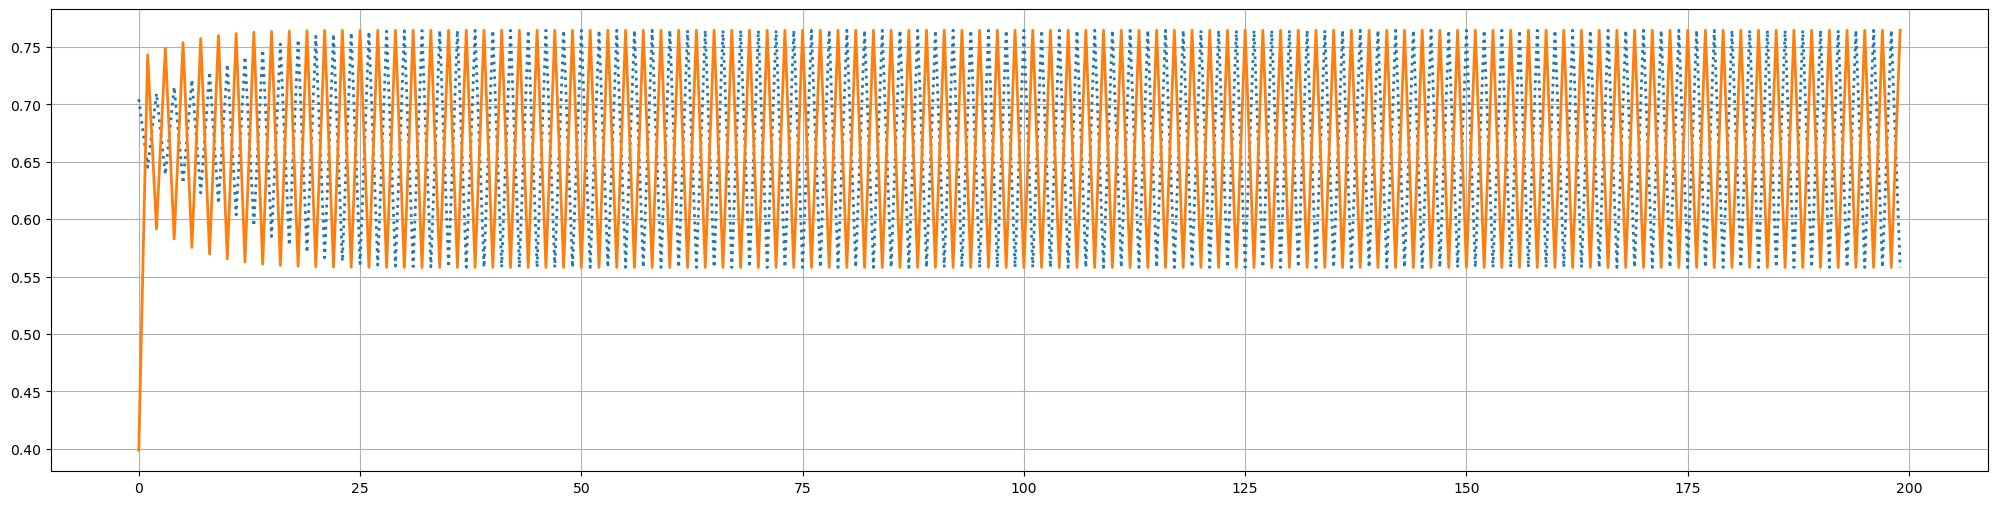

In [50]:
%matplotlib inline
plt.figure(figsize=(25,6))
plt.plot(
    X[i],
    ls=':',
    lw=2
)
plt.plot(
    X[j],
    ls='-',
    lw=2
)
plt.grid()
plt.show()

In [51]:
L,V=np.linalg.eigh(C)

In [53]:
L

array([-3.95452482e-14, -1.29870875e-14, -9.79706131e-15, -8.14806074e-15,
       -7.90975061e-15, -7.35232218e-15, -6.47603286e-15, -6.35301564e-15,
       -5.80680452e-15, -5.67382656e-15, -5.60247216e-15, -4.89286348e-15,
       -4.82688590e-15, -4.62726634e-15, -4.10772998e-15, -3.76377542e-15,
       -3.61066874e-15, -3.52475153e-15, -3.25026709e-15, -3.18729528e-15,
       -2.87867234e-15, -2.82083661e-15, -2.66934879e-15, -2.29434518e-15,
       -2.28972765e-15, -1.91244003e-15, -1.73107211e-15, -1.52354529e-15,
       -1.41491046e-15, -1.28259985e-15, -1.06656016e-15, -8.46974063e-16,
       -6.10615476e-16, -3.09291208e-16, -7.59987267e-17, -3.34278068e-17,
        6.22349143e-17,  1.24310301e-16,  3.08231790e-16,  7.48915931e-16,
        8.61979327e-16,  9.21873634e-16,  1.33549339e-15,  1.48308300e-15,
        1.52102357e-15,  1.73553457e-15,  1.95481478e-15,  2.06704622e-15,
        2.43696506e-15,  2.54640744e-15,  2.70008674e-15,  2.87622022e-15,
        3.19777244e-15,  

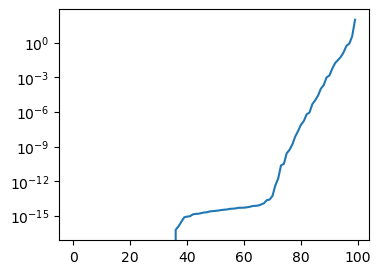

In [52]:
%matplotlib inline
plt.figure(figsize=(4,3))
plt.plot(L)
plt.yscale('log')
plt.show()

## Diagrama de bifurcación
> **Fuente**: [Kaggle](https://www.kaggle.com/code/miguelrodriguezolmos/plot-the-logistic-map-with-python-matplotlib)

In [10]:
y_ini = 0.01 # condicion inicial en el intervalo (0,1)
x_min, x_max = [1, 4] # normalmente es [0, 4], pero puede extenderse
y_min, y_max = [0, 1]
iters = 1000 #número de iteraciones
last = round(0.8*iters)
n_pixels = 3000
Zx = np.linspace(x_min, x_max, n_pixels)
y = np.repeat(y_ini, n_pixels)

for i in range(iters):
    y = Zx*y*(1-y)
    if i >= (iters-last): 
        if i == (iters-last): 
            D = np.array([Zx, y]).T
        else: 
            D = np.concatenate([D,np.array([Zx, y]).T], axis = 0)            
X = D[:,0]
Y = D[:,1]

- Eje vertical: punto estacionario $x^*$.
- Eje horizontal: parámetro $r$ del mapeo logístico.

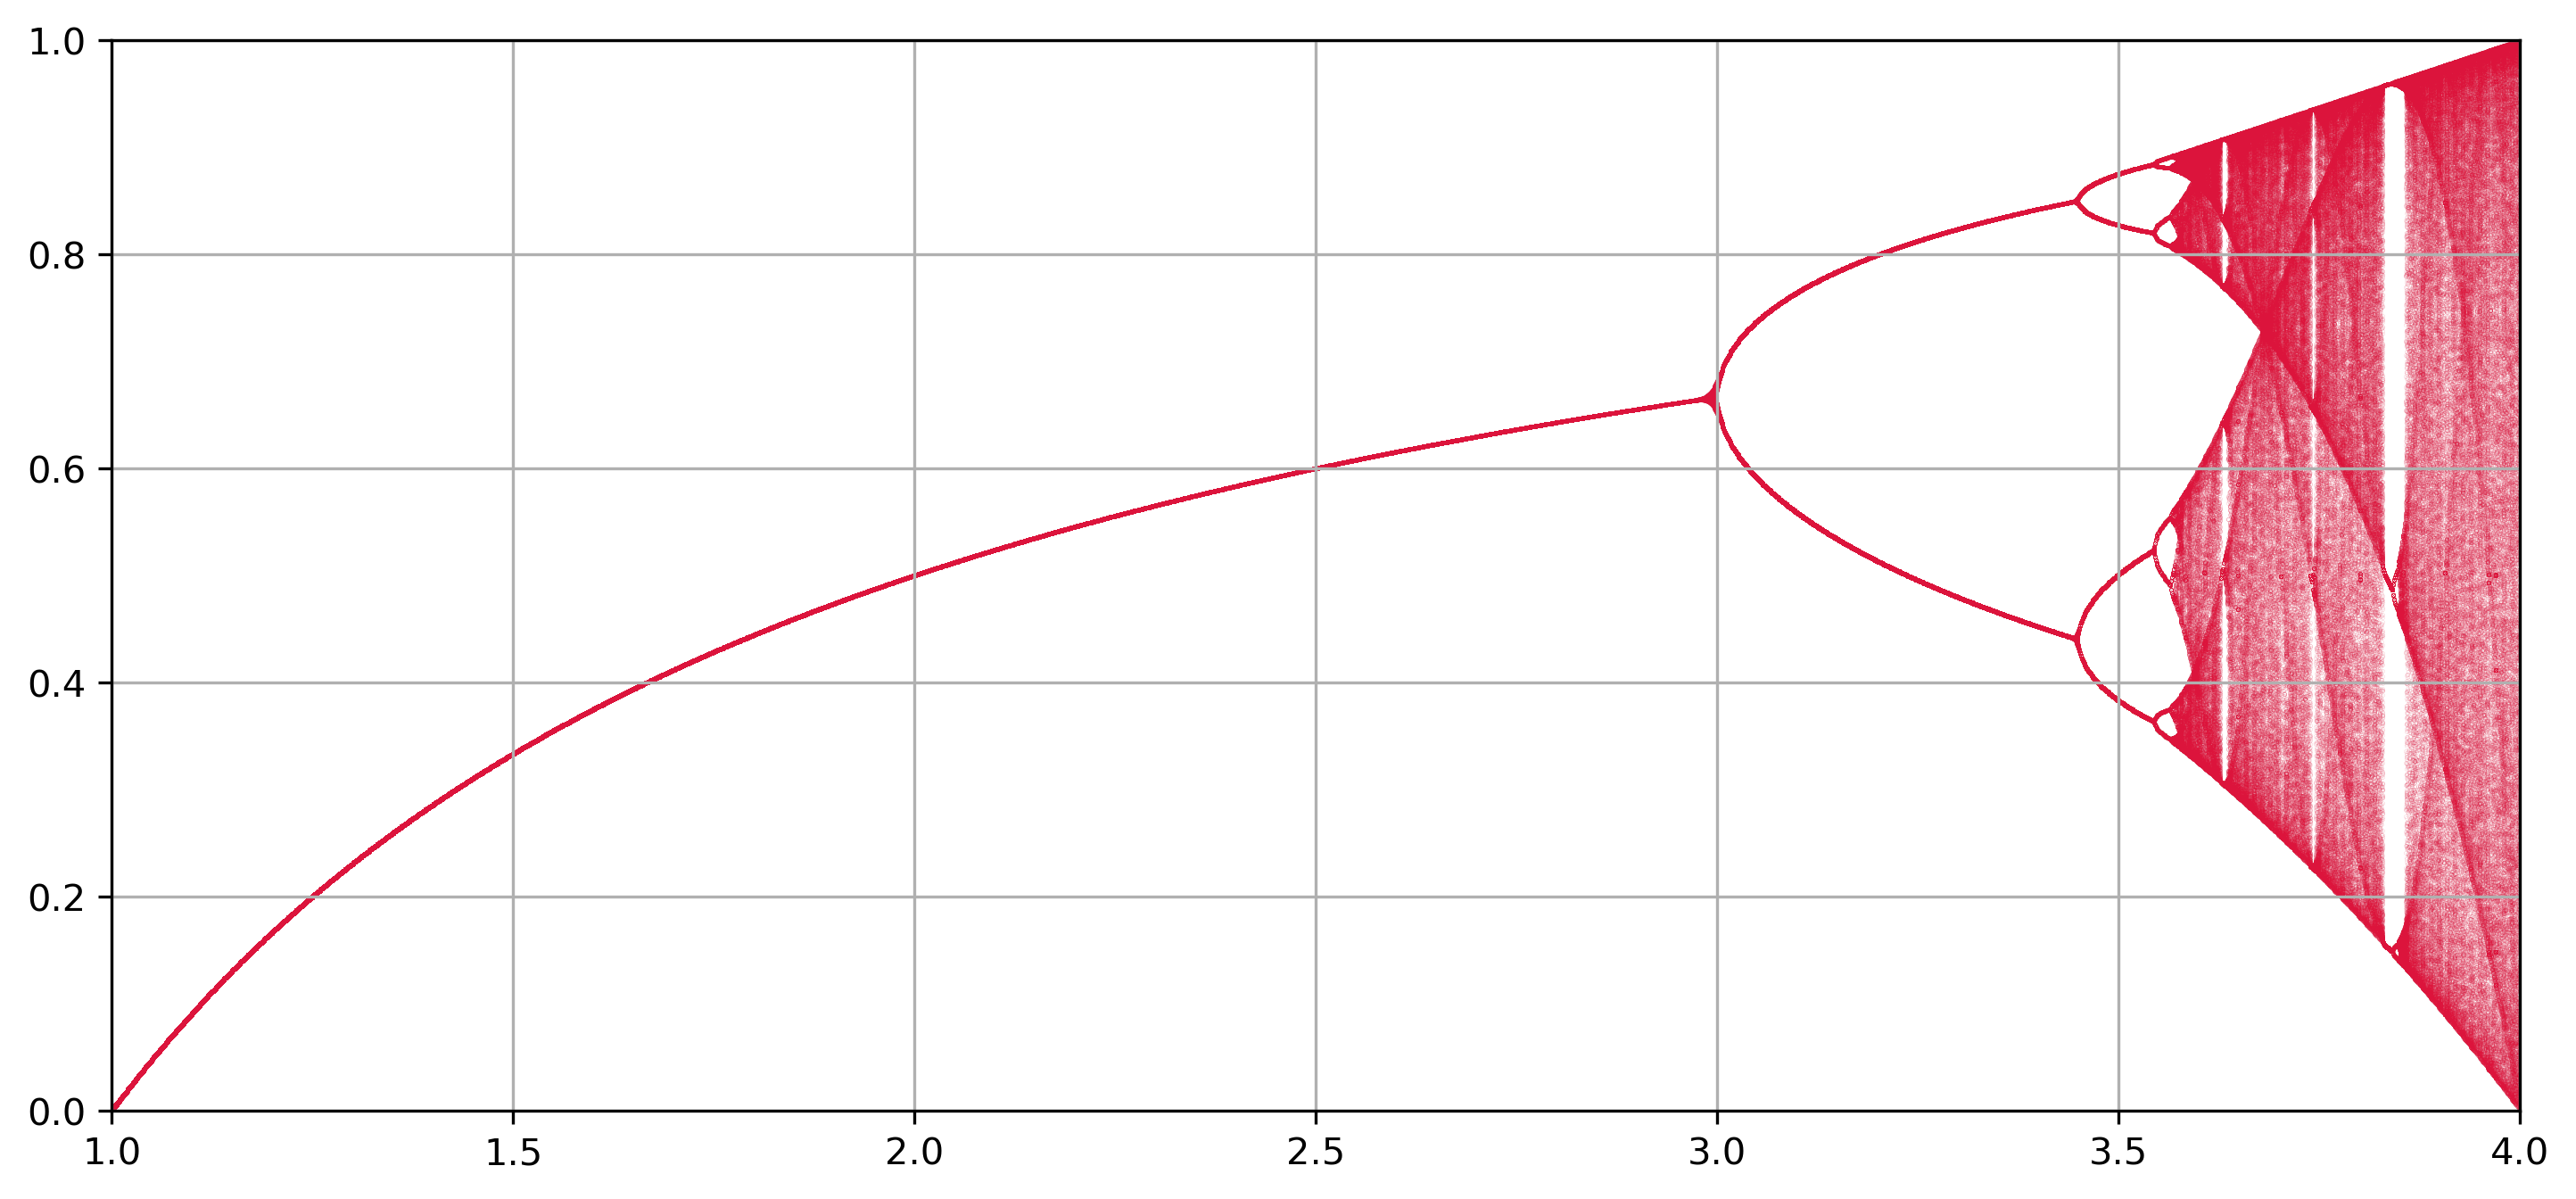

In [26]:
%matplotlib inline

fig, ax = plt.subplots(
    figsize=(9, 4), 
    dpi=300, 
    facecolor='white', 
    edgecolor='none'
)

#plt.axis('off')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

#plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)

#plt.gca().xaxis.set_major_locator(plt.NullLocator())
#plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.scatter(
    X,Y,
    s = (3*72/n_pixels)**2,
    alpha = 0.7,
    c = 'crimson',
    marker = '.'
)
plt.grid()

**Fun fact**: El diagrama de bifurcación tiene también una rama izquierda.

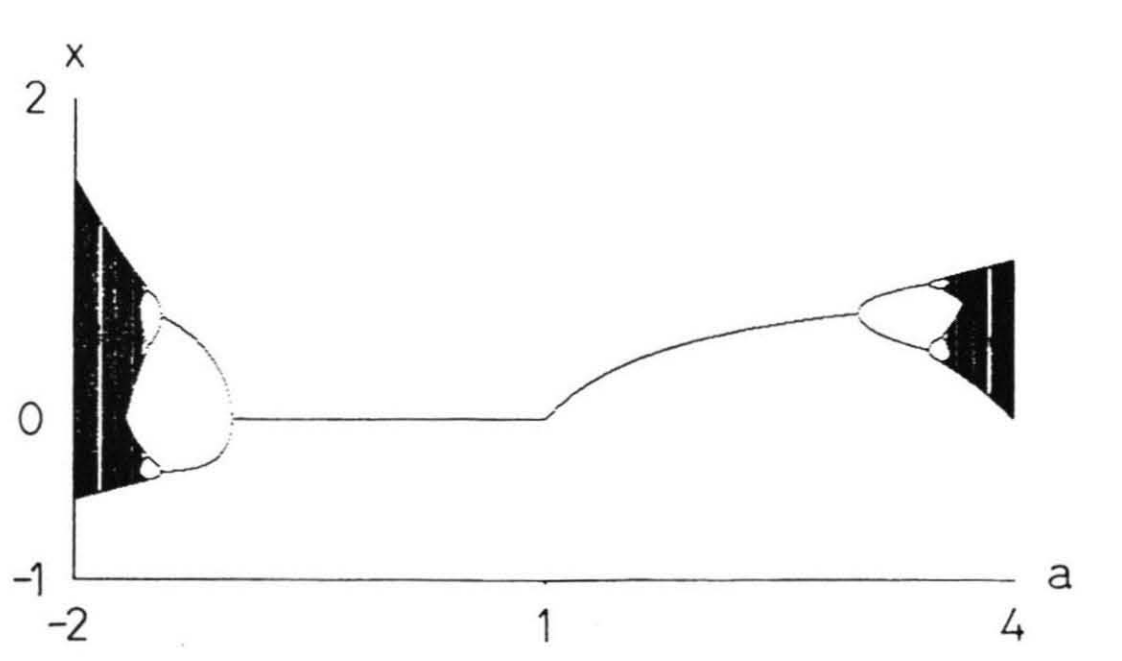

## Algunos videos

In [38]:
from IPython.display import YouTubeVideo

**This equation will change how you see the world (the logistic map)**

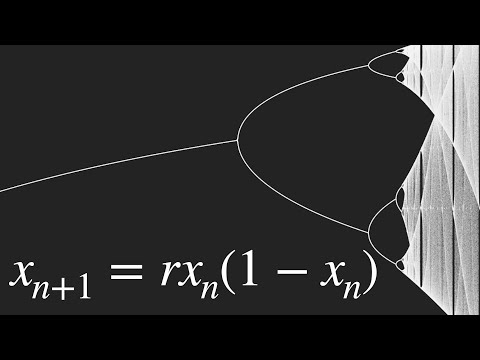

In [39]:
YouTubeVideo('ovJcsL7vyrk')

**Dimensions Chapter 6**

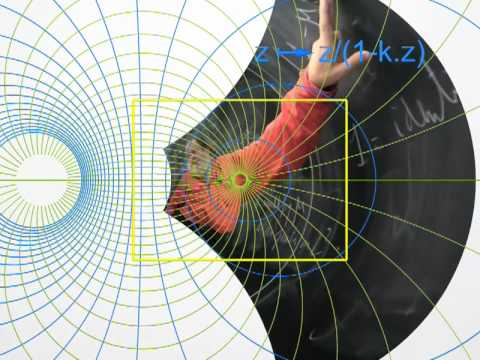

In [40]:
YouTubeVideo('0-vImw-4F18')

# Referencias

1. T, Tsuchiya and D. Yamagishi: [**The Complete Bifurcation Diagram for the Logistic Map**](https://www.degruyter.com/document/doi/10.1515/zna-1997-6-708/html).
2. P. Fieguth: **An Introduction to Complex Systems Society, Ecology, and Nonlinear Dynamics**.
  - Capítulo 6.
3. A. Fuchs: **Nonlinear Dynamics in Complex Systems Theory and Applications for the Life-, Neuro- and Natural Sciences**.
  - Capítulo 5.
4. S. Boccaletti et al: **Synchronization: From Coupled Systems to Complex Networks**.
  - Capítulos 1 y 2.